In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from utils import rnmse
import pandas as pd
import seaborn as sns
import matplotlib
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('hot', n_colors=7)
plt.rc('text', usetex=True)      

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

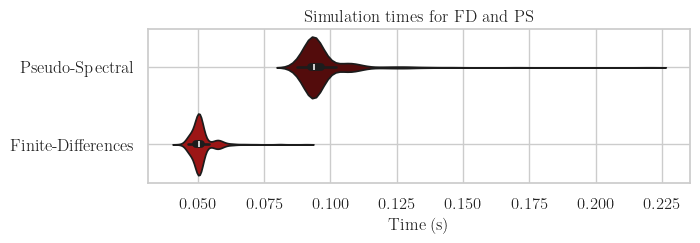

In [4]:
df = pd.read_csv("simulation_times.csv", usecols=[1,2])
plt.figure(figsize=(7, 2))
sns.violinplot(df, orient='h')
plt.grid()
plt.title("Simulation times for FD and PS")
plt.xlabel("Time (s)")
plt.grid(True)
plt.savefig("simulation_times.jpg")

In [5]:
df.describe()

,Pseudo-Spectral,Finite-Differences
count,500.000000,500.000000
mean,0.096963,0.051261
std,0.010743,0.004532
min,0.085921,0.043095
25%,0.092772,0.049361
50%,0.093692,0.050416
75%,0.096583,0.051338
max,0.220297,0.090988


In [2]:
x = torch.cat([torch.load("../dataset/x_train.pt"), torch.load("../dataset/x_train_2.pt")])
y = torch.cat([torch.load("../dataset/y_train.pt"), torch.load("../dataset/y_train_2.pt")])
c = torch.cat([torch.load("../dataset/c_train.pt"), torch.load("../dataset/c_train_2.pt")])

x_test = torch.load("../dataset/x_test.pt")
y_test = torch.load("../dataset/y_test.pt")
c_test = torch.load("../dataset/c_test.pt")

In [3]:
x0, y0, c0 = x[0], y[0], c[0]

In [4]:
x0.shape

torch.Size([256, 128])

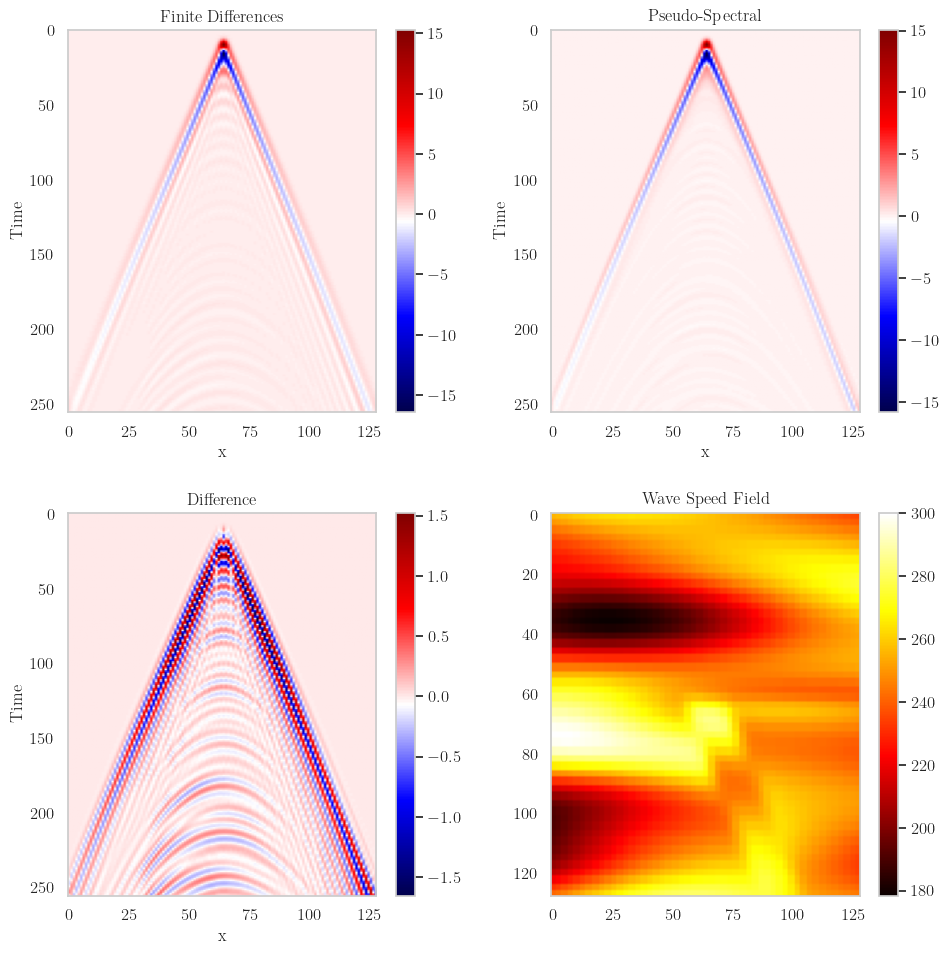

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
m = ax[0, 0].imshow(x0, aspect='auto', cmap='seismic')
ax[0, 0].set_title("Finite Differences")
plt.colorbar(m)
ax[0, 0].grid(False)
ax[0, 0].set_xlabel("x")
ax[0, 0].set_ylabel("Time")
m = ax[0, 1].imshow(y0, aspect='auto', cmap='seismic')
ax[0, 1].set_title("Pseudo-Spectral")
ax[0, 1].grid(False)
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("Time")
plt.colorbar(m)
m = ax[1, 0].imshow((x0-y0), aspect='auto', cmap='seismic')
ax[1, 0].set_title("Difference")
ax[1, 0].grid(False)
ax[1, 0].set_xlabel("x")
ax[1, 0].set_ylabel("Time")
plt.colorbar(m)
m = ax[1, 1].imshow(c0, aspect='auto', cmap='hot')
ax[1, 1].set_title("Wave Speed Field")
ax[1, 1].grid(False)
plt.colorbar(m)
plt.savefig("sample_example.jpg", dpi=150)
plt.tight_layout()
plt.show()

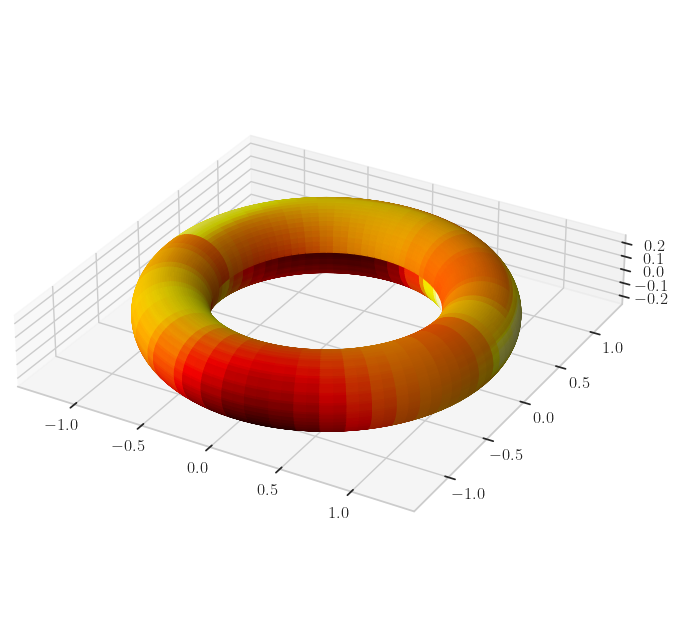

In [6]:
# Source - https://stackoverflow.com/a/77212452
# Posted by Davide_sd, modified by community. See post 'Timeline' for change history
# Retrieved 2026-02-18, License - CC BY-SA 4.0
from matplotlib.colors import Normalize
import matplotlib

theta_dim, phi_dim = c0.shape
a = c0

# Generating Torus Mesh
angle = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# compute the indexes
t, p = [var / (2 * np.pi) for var in [theta, phi]]
t = np.floor((t - 0.5) * a.shape[0]).astype(int) + 1
p = np.floor((p - 0.5) * a.shape[1]).astype(int) + 1
# extract the color value from the matrix
colors = a[t, p]
# apply a colormap to the normalized color values
norm = Normalize(vmin=colors.min(), vmax=colors.max())
cmap = matplotlib.colormaps.get_cmap("hot")
normalized_colors = cmap(norm(colors))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=normalized_colors)
ax.set_aspect("equal")
plt.show()

The initial error between FD and PS is evaluated.

In [7]:
print(f"Train RNSME: {rnmse(x, y)}")
print(f"Test RNSME: {rnmse(x_test, y_test)}")

Train RNSME: 0.38560399413108826
Test RNSME: 0.38336923718452454


First question: how well can the problem of getting $y$ (PS), knowing $x$ (FD) using a linear regression be solved ?

In [8]:
x_np, y_np, c_np = x.numpy(), y.numpy(), c.numpy()
x_np_reshaped, y_np_reshaped, c_np_reshaped = x_np.reshape((x_np.shape[0], -1)), y_np.reshape((y_np.shape[0], -1)), c_np.reshape((c_np.shape[0], -1))
x_test_np, y_test_np, c_test_np = x_test.numpy(), y_test.numpy(), c_test.numpy()
x_test_np_reshaped, y_test_np_reshaped, c_test_np_reshaped = x_test_np.reshape((x_test_np.shape[0], -1)), y_test_np.reshape((y_test_np.shape[0], -1)), c_test_np.reshape((c_test_np.shape[0], -1))

In [18]:
diff = y_np.flatten()-x_np.flatten()

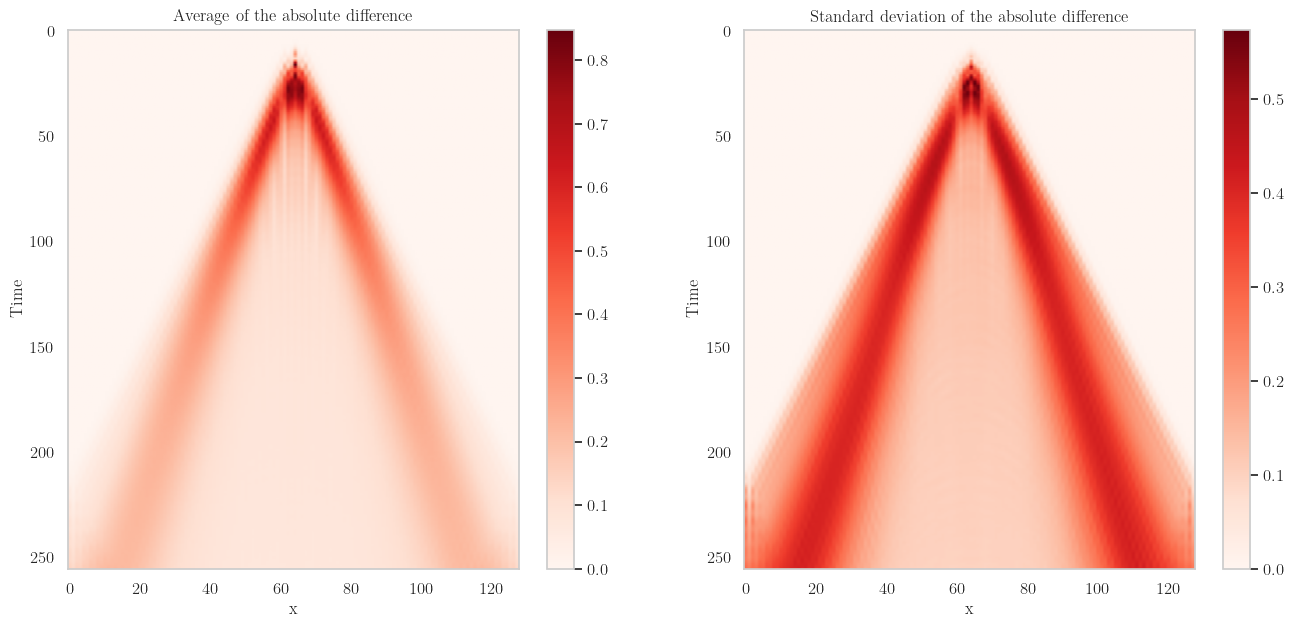

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
m = ax[0].imshow((np.mean(np.abs(diff.reshape(x_np.shape)), axis=0)), aspect='auto', cmap='Reds')
ax[0].grid(False)
plt.colorbar(m)
ax[0].set_xlabel("x")
ax[0].set_ylabel("Time")
ax[0].set_title("Average of the absolute difference")
m = ax[1].imshow((np.std(np.abs(diff.reshape(x_np.shape)), axis=0)), aspect='auto', cmap='Reds')
ax[1].grid(False)
plt.colorbar(m)
ax[1].set_xlabel("x")
ax[1].set_ylabel("Time")
ax[1].set_title("Standard deviation of the absolute difference")
plt.savefig('error_heatmap.jpg', dpi=150)
plt.show()

In [24]:
print(np.mean(diff))
print(np.std(diff))

5.1787e-07
0.24183463


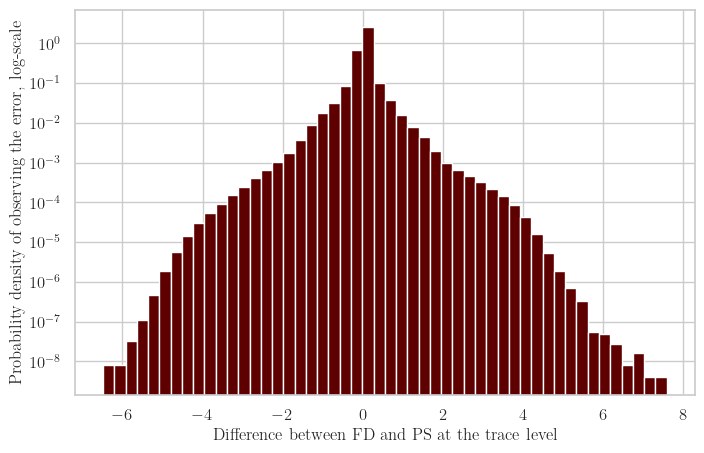

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(diff, density=True, bins=50, log=True)
plt.grid(True)
#plt.xlim([-1.5, 1.5])
plt.xlabel("Difference between FD and PS at the trace level")
plt.ylabel("Probability density of observing the error, log-scale")
plt.savefig("error_analysis.jpg", dpi=150)
plt.show()